# LHCb Starter Kit 2023: Statistics II

**Hans Dembinski, TU Dortmund**

* Uncertainties of estimators
* Bootstrapping of uncertainties
* Error propagation
* Estimation of systematic uncertainties
* Resources for further learning

![image.png](https://imgs.xkcd.com/comics/error_bars.png)

## What is an uncertainty, really?

* Example: $a = 3 \pm 0.5$, where 0.5 is the *standard error* (jargon: "error" = uncertainty)

* What we would like it to mean: "The true value is between 2.5 and 3.5 with a probability of 68 %"


* What it technically means (in most cases): "The interval 2.5 to 3.5, **if always constructed with the same procedure**, contains the true value in 68 % of **identically repeated random experiments**."

* Both statements coincide only in the asymptotic limit of infinitely large samples

## Statistical and systematic uncertainties

### Statistical uncertainty
* Origin: We use finite sample instead of infinite distribution
* Goes down as simple size increases
* Example
    * Arithmetic mean: $\bar x = \frac 1N\sum_i x_i$
    * Variance of $\bar x$: $\hat V_{\bar x} = \frac{1}{N - 1} \frac 1 N\sum_i (x_i - \bar x)^2$
* We have reliable standard recipes to calculate these

#### Variance or standard deviation?
* Standard deviation $\sigma = \sqrt{V}$
* Variance is more fundamental
    * Second central moment of distribution
    * $V = V_1 + V_2$, but $\sigma = \sqrt{\sigma_1^2 + \sigma_2^2}$
* Communicate standard deviations, compute with variances

### Systematic uncertainty
* Origin: Imperfect appartus or technique, deviations of reality from simplified models
* Quantifies potential mistakes in analysis
* Does not go down as sample size increases
* Often correlated
    * Real-life: Measured the length of ten shoes with ruler than has factory tolerance of 0.1 mm
    * LHCb: Measured cross-sections with value of luminosity that has uncertainty of 1-2%
* Not well covered in statistics books, but some theoretical results available

## Estimators

* **Estimator** maps dataset to value $\{x_i \} \to \hat p$
    * Notation: $\hat p$ is **estimate** of true value $p$
    * Estimator can have functional form or be an algorithm
    * Arithmetic mean $\hat \mu = \frac 1N \sum_i x_i$
    * Sample median: Sort $\{ x_i \}$, pick value in the middle

* Many kinds of estimators, some better than others

* **Optimal** estimators
    * As close to true value as possible
    * Easy to compute and/or easy to apply to any problem
    * Robustness against outliers

* In HEP, we mainly use
    * Plug-in estimator
    * Maximum-likelihood estimator (MLE)

## Bias and variance

* In one experiment, we obtain sample $\{ x_i \}$ with size $N$ and compute estimate $\hat a$
* Sample $\{ x_i \}$ is random, estimate $\hat a$ also random
* If experiment is identically repeated $K$ times, we get sample $\{ x_i \}_k$ and estimate $\hat a_k$ each time
* Derive accuracy of estimator from estimates $\{ \hat a_1, \hat a_2, \dots, \hat a_K \}$
    * Bias of $\hat a$ = $\frac1K \sum_i (\hat a_i - a)$
    * Variance of $\hat a$ = $\frac 1 {K -1}\sum_i (\hat a_i - \frac 1K \sum_k \hat a_k)^2$
* Example for biased estimator: $\hat V = \frac1N\sum_i (x_i - \hat\mu)^2$ is biased if $\hat \mu$ is estimated from same sample

In [1]:
from matplotlib import pyplot as plt
import numpy as np

mu = 1
sigma = 1

N = 10
K = 10000
var_1, var_2 = [], []
for k in range(K):
    rng = np.random.default_rng(seed=k)
    x_k = rng.normal(mu, sigma, size=N)
    v1 = np.var(x_k)
    v2 = np.mean((x_k - mu) ** 2)
    var_1.append(v1)
    var_2.append(v2)

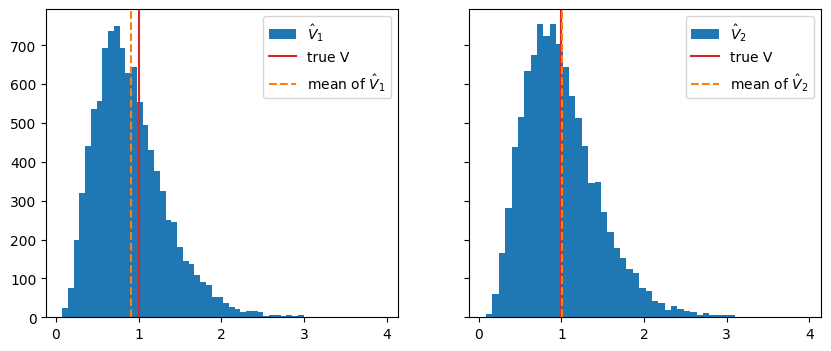

In [2]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 4))
ax[0].hist(var_1, bins=50, label="$\hat V_1$");
ax[1].hist(var_2, bins=50, label="$\hat V_2$");
for axi in ax:
    axi.axvline(sigma ** 2, color="C3", label="true V")
ax[0].axvline(np.mean(var_1), color="C1", ls="--", label="mean of $\hat V_1$")
ax[1].axvline(np.mean(var_2), color="C1", ls="--", label="mean of $\hat V_2$")
for axi in ax:
    axi.legend()

* Well-known bias correction for this case:
  $$
  \hat V_{1,\text{corr}} = \frac N{N-1}\hat V_1
  $$
  For derivation see e.g. F. James book (references at end)

**Exercise**
* Compute $\hat V_{1, \text{corr}}$ and compare its mean with true $V$

In [3]:
# do exercise here

### Plug-in estimator

* Plug-in principle: replace true values in some formula with estimates, e.g.

$$
c = g(a, b, \dots) \to \hat c = g(\hat a, \hat b, \dots)
$$

* Justification
    * For $N\to \infty$, $\Delta a = \hat a - a \to 0$ for any reasonable estimator
    * $g(\hat a) = g(a + \Delta a) = g(a) + O(\Delta a) \to g(a)$ for smooth $g$

* Example: $\sqrt{N}$ uncertainty estimator for Poisson-distributed count $N$
    * $P(N; \lambda) = e^{-\lambda} \lambda^N / N!$
    * Variance of counts: $V_N = \lambda$
    * Estimator $\hat \lambda = \frac 1 K \sum_k N_k$; for $K = 1$, $\hat \lambda = N$
    * Plug-in principle: $\hat V_N = \hat \lambda = N$
    * Standard deviation: $\hat \sigma_N = \sqrt{\hat V_N} = \sqrt{N}$

* Plug-in estimators can behave poorly in small samples
* Poisson example: $\lambda = 0.01$, sample $N = 0 \to \hat \sigma_N = 0$


## Bootstrapping bias and variance of estimators

* Bootstrap method: generic way to compute bias and variance of any estimator

### Parametric bootstrap

* Available:
    * Sample $\{ x_i \}$ distributed along $f(x; a)$, $a$ is unknown
    * Estimator for $\hat a$
* Want to know bias and variance of estimator
* Simulate experiment $K$ times
    * Draw samples $\{ x_i \}_k$ of equal size from $\hat f(x; \hat a)$ (plugin-estimate)
    * Compute $\hat a_k$
    * Bias $\frac 1 K \sum_k (\hat a_k - \hat a)$
    * Variance $\frac 1 {K-1} \sum_k (\hat a_k - \frac 1K \sum_k \hat a_k)^2$

In [4]:
from numba_stats import norm, truncexpon, poisson


def make_data(s, mu, sigma, b, slope, seed):
    sr = poisson.rvs(s, size=1, random_state=seed)[0]
    br = poisson.rvs(b, size=1, random_state=seed)[0]
    s = norm.rvs(mu, sigma, size=sr, random_state=seed)
    b = truncexpon.rvs(0, 1, 0, slope, size=br, random_state=seed)
    return np.append(s, b)

truth = {
    "s": 1000,
    "mu": 0.5,
    "sigma": 0.05,
    "b": 500,
    "slope": 1,
}

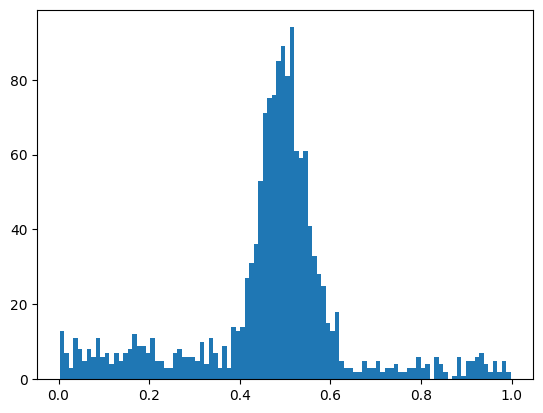

In [5]:
x = make_data(**truth, seed=0)

w, xe = plt.hist(x, bins=100)[:2];

In [6]:
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL
from numba_stats import norm, truncexpon

def model(x, s, mu, sigma, b, slope):
    return s * norm.cdf(x, mu, sigma) + b * truncexpon.cdf(x, 0, 1, 0, slope)

nll = ExtendedBinnedNLL(w, xe, model)
m = Minuit(nll, **truth)
m.limits["mu"] = (0, 1)
m.limits["s", "b", "sigma", "slope"] = (0, None)

In [7]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 106.9 (χ²/ndof = 1.1)      │              Nfcn = 101              │
│ EDM = 9.95e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s     │   1000    │    35     │            │            │    0    │         │       │
│ 1 │ mu    │  0.4983   │  0.0018   │            │            │    0    │    1    │       │
│ 2 │ sigma │  0.0482   │  0.0014   │            │            │    0    │         │       │
│ 3 │ b     │    510    │    27     │            │            │    0    │         │       │
│ 4 │ slope │   0.95    │   0.15    │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │          s         mu      sigma          b      slope │
├───────┼────────────────────────────────────────────────────────┤
│     s │    1.2e+03   -48.4e-6  8.9237e-3     -0.2e3     -0.368 │
│    mu │   -48.4e-6   3.09e-06         -0    61.5e-6   -17.0e-6 │
│ sigma │  8.9237e-3         -0   2.12e-06 -8.9641e-3   -16.5e-6 │
│     b │     -0.2e3    61.5e-6 -8.9641e-3        711      0.354 │
│ slope │     -0.368   -17.0e-6   -16.5e-6      0.354     0.0213 │
└───────┴────────────────────────────────────────────────────────┘

* Fit can be written as estimator

In [8]:
def estimator(x):
    w = np.histogram(x, bins=xe)[0]
    nll = ExtendedBinnedNLL(w, xe, model)
    m = Minuit(nll, **truth)
    m.limits["mu"] = (0, 1)
    m.limits["s", "b", "sigma", "slope"] = (0, None)
    m.migrad()
    assert m.valid
    return m.values

In [9]:
replicates = []
for seed in range(100):
    x_k = make_data(*m.values, seed=seed+1)
    p_k = estimator(x_k)
    replicates.append(p_k)

replicates = np.transpose(replicates)

**Exercise**

* Compute bias and standard deviation of replicates for each parameter
* Compare standard deviation of replicates with Minuit's uncertainty estimate, accessible via `m.errors`

In [10]:
# do exercise here

## Nonparametric bootstrap

* Can do the same by sampling directly from $\{ x_i \}$
* Standard method for samples of fixed size $N$:
  * Pick $N$ random samples from $\{ x_i \}$ with replacement to obtain $\{ x_i \}_k$
  * Compute $\hat a_k$ from $\{ x_i \}_k$ and proceed as before
* "Extended method" for samples of variable size (Poisson):
  * Randomly draw $M$ from Poisson distribution with $\lambda = N$
  * Pick $M$ random samples from $\{ x_i \}$ with replacement to obtain $\{ x_i \}_k$
  * ...
* Convenient: use same algorithms for any distribution
* Efficient implementations for both algorithms in `resample`

![](https://resample.readthedocs.io/en/stable/_images/logo.svg)

In [11]:
import resample

resample.__version__

'1.7.1'

In [12]:
from resample.bootstrap import resample

# generate replicated samples of varying size (Poisson distributed)
for x_k in resample(x, size=100, method="extended", random_state=1):
    print(x_k)
    break

[0.58820262 0.58820262 0.52000786 ... 0.38532216 0.26892968 0.26892968]


**Exercise**

* Again compute replicated fit results using `resampe` and store results in a list
* Copy previous code where possible
* Again compute bias and standard deviation of replicates and compare with Minuit's uncertainty estimate

In [13]:
# do exercise here

* `resample` provides shortcut for computing variance

In [14]:
from resample.bootstrap import variance

var = variance(estimator, x, method="extended", size=100, random_state=1)

for i, name in enumerate(m.parameters):
    std = var[i] ** 0.5
    print(f"{name:8} 𝜎(Minuit) = {m.errors[i]:6.2g} 𝜎(bootstrap) = {std:6.2g}")

s        𝜎(Minuit) =     35 𝜎(bootstrap) =     33
mu       𝜎(Minuit) = 0.0018 𝜎(bootstrap) = 0.0017
sigma    𝜎(Minuit) = 0.0015 𝜎(bootstrap) = 0.0014
b        𝜎(Minuit) =     27 𝜎(bootstrap) =     27
slope    𝜎(Minuit) =   0.15 𝜎(bootstrap) =   0.17


**Exercise**

* Repeat the variance calculation without using `method="extended"`
* Compare the uncertainties of $s$ and $b$

In [15]:
# do exercise here

* Bootstrap can be applied to most statistical problems in HEP
* Restriction: samples must be identically and independently distributed
* May work well even with small samples (< 10)

## Error propagation

* Full analysis typically combines many intermediate results with uncertainties into final result
* Consider $\vec b = g(\vec a)$ with uncertainties in $\vec a$
* Two ways of computing uncertainties of $\vec b$
  * Monte-Carlo simulation
  * Error propagation
* Can be equally used for statistical and systematic uncertainties

### Monte-Carlo simulation

* Draw variations of fit result from multivariate normal distribution
* Compute variable of interest from variations
* Compute standard deviation or covariance of 

* Example: compute uncertainty of $\hat N = \hat s + \hat b$

In [16]:
rng = np.random.default_rng(1)
a_k = rng.multivariate_normal(m.values, m.covariance, size=1000)

def g(a):
    return a[0] + a[3]

b_k = np.apply_along_axis(g, -1, a_k)

print(f"𝜎(N, simulation) = {np.std(b_k):.3g}")
print(f"𝜎(N, naive)      = {(m.errors[0]**2 + m.errors[3]**2)**0.5:.3g}")
print(f"𝜎(N, expected)   = {np.sqrt(len(x)):.3g}")

𝜎(N, simulation) = 37.7
𝜎(N, naive)      = 43.7
𝜎(N, expected)   = 38.8


* $\sigma_{N,\text{simulation}}^2 < \sigma_s^2 + \sigma_b^2$, because $s_k$ and $b_k$ are anti-correlated 

### Error propagation
* Given: $\vec a$ with covariance matrix $C_a$ and differentiable function $\vec b = g(\vec a)$
* $\vec b$ can have different dimensionality from $\vec a$
* One can derive via first-order Taylor expansion:
  $$
  C_b = J \, C_a \, J^T \text{ with } J_{ik} = \frac{\partial g_i}{\partial a_k}
  $$

* Useful special cases
    * Sum of scaled independent random values $c = \alpha a + \beta b$ ($\alpha, \beta$ are constant)
    $$
    \sigma^2_c = \alpha^2 \sigma^2_a + \beta^2 \sigma^2_b
    $$
    * Product of powers of independent random values $c = a^\alpha \, b^\beta$
    $$
    \left(\frac{\sigma_c}{c}\right)^2 = \alpha^2 \left(\frac{\sigma_a}{a}\right)^2 + \beta^2 \left(\frac{\sigma_b}{b}\right)^2
    $$
* Final uncertainty often dominated by one term
* When estimating systematic uncertainties: put your effort in estimating **largest term** and be lax on others

* Computation of $J$ by hand error-prone and tedious
* `jacobi` library offers automatic error propagation based on a robust numerical derivative

![](https://camo.githubusercontent.com/27771f02972dd2b6acd8219907d15eb6a4e349e9086191b2ea33e2fd534b42b7/68747470733a2f2f6864656d62696e736b692e6769746875622e696f2f6a61636f62692f5f696d616765732f6c6f676f2e737667)

In [17]:
import jacobi

jacobi.__version__

'0.9.2'

In [18]:
b, cov_b = jacobi.propagate(g, m.values, m.covariance)

f"𝜎(N, error propagation) = {cov_b ** 0.5:.3g} 𝜎(N, expected) = {np.sqrt(len(x)):.3g}"

'𝜎(N, error propagation) = 38.9 𝜎(N, expected) = 38.8'

* `jacobi.propagate` works for any differentiable mapping, which even includes most fits!

In [19]:
from iminuit.cost import LeastSquares

def h(pvec):
    a, b = pvec
    x = np.array([1, 2, 3])
    y = a + b * x
    m = Minuit(LeastSquares(x, y, 1, lambda x, a, b: a + b * x), a=0, b=0)
    m.strategy = 0
    m.migrad()
    assert m.valid
    return m.values

jacobi.propagate(h, (1, 2), (1, 1))

(array([1., 2.]),
 array([[ 1.00000000e+00, -1.84267416e-12],
        [-1.84267416e-12,  1.00000000e+00]]))

* `jacobi.propagate` makes complex error propagation feasible
* Extensively used in the [pp @ 13 TeV analysis of prompt charged particle production](https://inspirehep.net/literature/1889335)
![](covariance_example.png)

## Systematic uncertainties: Known unknowns

"There are known knowns, things we know that we know;<br>
and there are known unknowns, things that we know we don't know.<br>
But there are also unknown unknowns, things we do not know we don't know."<br>
*Donald Rumsfeld*

* Why data analyses take so long: study data, detector, and methods to turn **unknown unknowns** into **known knowns** or **known unknowns**
* **known unknowns** = systematic uncertainties
* No formal way, but generally...


Worry
* What could go wrong?
* What are my assumptions?

Example
* You take an efficiency or correction factor from simulation, but simulation differs from real experiment.
* Solution: Perform control measurement to estimate how much simulation differs from real experiment.

Methods
  * Use methods that are known to be optimal for your problem or derive them from first principles
  * General purpose methods often safer to use than special-case methods
  * Maximum-likelihood fit > least-squares fit
  * Bootstrap estimate of uncertainty > other uncertainty estimates

Apply **checks**
* Validate whole analysis on simulated data (sometimes you can use toy simulation)
* Split data by magnet polarity, fill, etc., analyze splits separately, check for agreement

Guidelines for handling systematic errors
* [Roger Barlow: Systematic Errors: Facts and Fictions (2002)](https://arxiv.org/pdf/hep-ex/0207026.pdf)
* [Roger Barlow, "Practical Statistics for Particle Physics" (2019), Section 6.5 ](https://arxiv.org/pdf/1905.12362.pdf)


## Further resources for learning

### LHCb Statistics and ML WG

* [TWiki page](https://twiki.cern.ch/twiki/bin/view/LHCbPhysics/LHCbStatistics)

* [Statistics Guidelines](https://gitlab.cern.ch/lhcb/statistics-guidelines/-/blob/master/main.md) to collect information about best practices

### Introductory statistics books

* [List of books on TWiki pages of Statistis and Machine Learning WG](https://twiki.cern.ch/twiki/bin/viewauth/LHCbPhysics/LHCbStatistics)

* Books I personally like a lot
    * Glen Cowan, "Statistical Data Analysis", Oxford University Press, 1998
    * F. James, "Statistical Methods in Experimental Physics", 2nd edition, World Scientific, 2006
    * R. Barlow, "Statistics: a Guide to the Use of Statistical Methods in the Physical Sciences", Wiley, 1989
    * B. Efron, R.J. Tibshirani, "An Introduction to the Bootstrap", CRC Press, 1994


### Lectures, papers, notebooks

* Roger Barlow
    * [Introductory lecture (2019)](http://barlow.web.cern.ch/barlow/talks/2019/10.pdf)
    * [Systematic Errors: Facts and Fictions (2002)](https://arxiv.org/pdf/hep-ex/0207026.pdf)
    * ["Practical Statistics for Particle Physics" (2019), Section 6.5 ](https://arxiv.org/pdf/1905.12362.pdf)

* More Jupyter notebooks
    * [Matt Kenzie, PDG averaging](https://github.com/matthewkenzie/notebooks/blob/master/pdg_averaging.ipynb)
    * [Matt Kenzie, MLE uncertainties](https://github.com/matthewkenzie/notebooks/blob/master/LikelihoodProb.ipynb)
    * [iminuit tutorials on various fitting topics](https://iminuit.readthedocs.io/en/stable/tutorials.html)

* All about sWeights and COWs with gentle derivation
  * [HD, M. Kenzie, C. Langenbruch, M. Schmelling, Nucl.Instrum.Meth.A 1040 (2022) 167270](https://inspirehep.net/literature/1986730)

* Machine learning
    * [Scikit-Learn](https://scikit-learn.org/stable/)
    * [UvA Deep Learning tutorials (JAX/FLAX or Torch)](https://uvadlc-notebooks.readthedocs.io/en/latest/index.html)